In [ ]:
from keras.applications import VGG16
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Normalization
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import LeakyReLU

In [ ]:

vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(40, 40, 3))

In [ ]:
model = Sequential()
model.add(vgg_model)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(36, activation='softmax'))


In [ ]:
for layer in vgg_model.layers:
    layer.trainable = False

In [ ]:

sgd = SGD(lr=0.0005, momentum=0.9)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:

train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory('/content/drive/MyDrive/AI/Train_Ai_Image-Resized/TRAIN/', 
                                                    target_size=(40, 40), batch_size=32, class_mode='categorical')
test_generator = test_datagen.flow_from_directory('/content/drive/MyDrive/AI/Train_Ai_Image-Resized/TEST/', 
                                                  target_size=(40, 40), batch_size=32, class_mode='categorical')


Found 1798 images belonging to 36 classes.
Found 358 images belonging to 36 classes.


In [ ]:

model.fit_generator(train_generator, steps_per_epoch=len(train_generator), epochs=20, 
                    validation_data=test_generator, validation_steps=len(test_generator))
score = model.evaluate_generator(test_generator, steps=len(test_generator))
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/20


<ipython-input-14-0a948d9e7399>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_generator, steps_per_epoch=len(train_generator), epochs=20, validation_data=test_generator, validation_steps=len(test_generator))


57/57 [==============================] - 5s 93ms/step - loss: 2.4298 - accuracy: 0.4783 - val_loss: 2.2747 - val_accuracy: 0.7654
Epoch 2/20
57/57 [==============================] - 6s 101ms/step - loss: 2.3619 - accuracy: 0.5072 - val_loss: 2.2184 - val_accuracy: 0.7709
Epoch 3/20
57/57 [==============================] - 5s 93ms/step - loss: 2.3446 - accuracy: 0.4939 - val_loss: 2.1686 - val_accuracy: 0.7961
Epoch 4/20
57/57 [==============================] - 6s 97ms/step - loss: 2.2708 - accuracy: 0.5250 - val_loss: 2.1175 - val_accuracy: 0.7989
Epoch 5/20
57/57 [==============================] - 5s 90ms/step - loss: 2.2293 - accuracy: 0.5250 - val_loss: 2.0714 - val_accuracy: 0.7849
Epoch 6/20
57/57 [==============================] - 6s 96ms/step - loss: 2.1767 - accuracy: 0.5478 - val_loss: 2.0185 - val_accuracy: 0.8184
Epoch 7/20
57/57 [==============================] - 7s 118ms/step - loss: 2.1694 - accuracy: 0.5384 - val_loss: 1.9734 - val_accuracy: 0.8128
Epoch 8/20
57/57 [====

<ipython-input-14-0a948d9e7399>:3: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  score = model.evaluate_generator(test_generator, steps=len(test_generator))


Test loss: 1.4716365337371826
Test accuracy: 0.8603351712226868


In [ ]:
#Save model
model.save('/content/drive/MyDrive/AI/models/Face.h5')

In [3]:
from keras.models import load_model
model = load_model('/content/drive/MyDrive/AI/models/Face.h5')

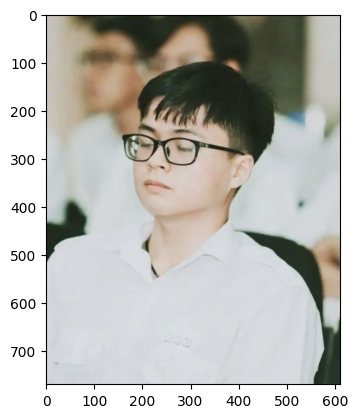

In [1]:
from keras.utils import load_img
from keras.utils import img_to_array
from pylab import *
url = 'thach.JPG'
img = load_img(url)
imshow(img)

1/1 [==============================] - 0s 392ms/step


array([15])

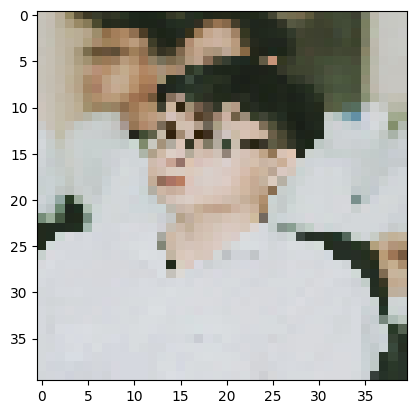

In [4]:
img = load_img(url, target_size = (40,40))
imshow(img)
img = img_to_array(img)
img = img.reshape(1,40,40,3)
img = img.astype('float32')
img = img/255
np.argmax(model.predict(img), axis = -1)